<a href="https://colab.research.google.com/github/jmoralespineda/TEORIA_DE_SE-ALES/blob/main/01a0CorrFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

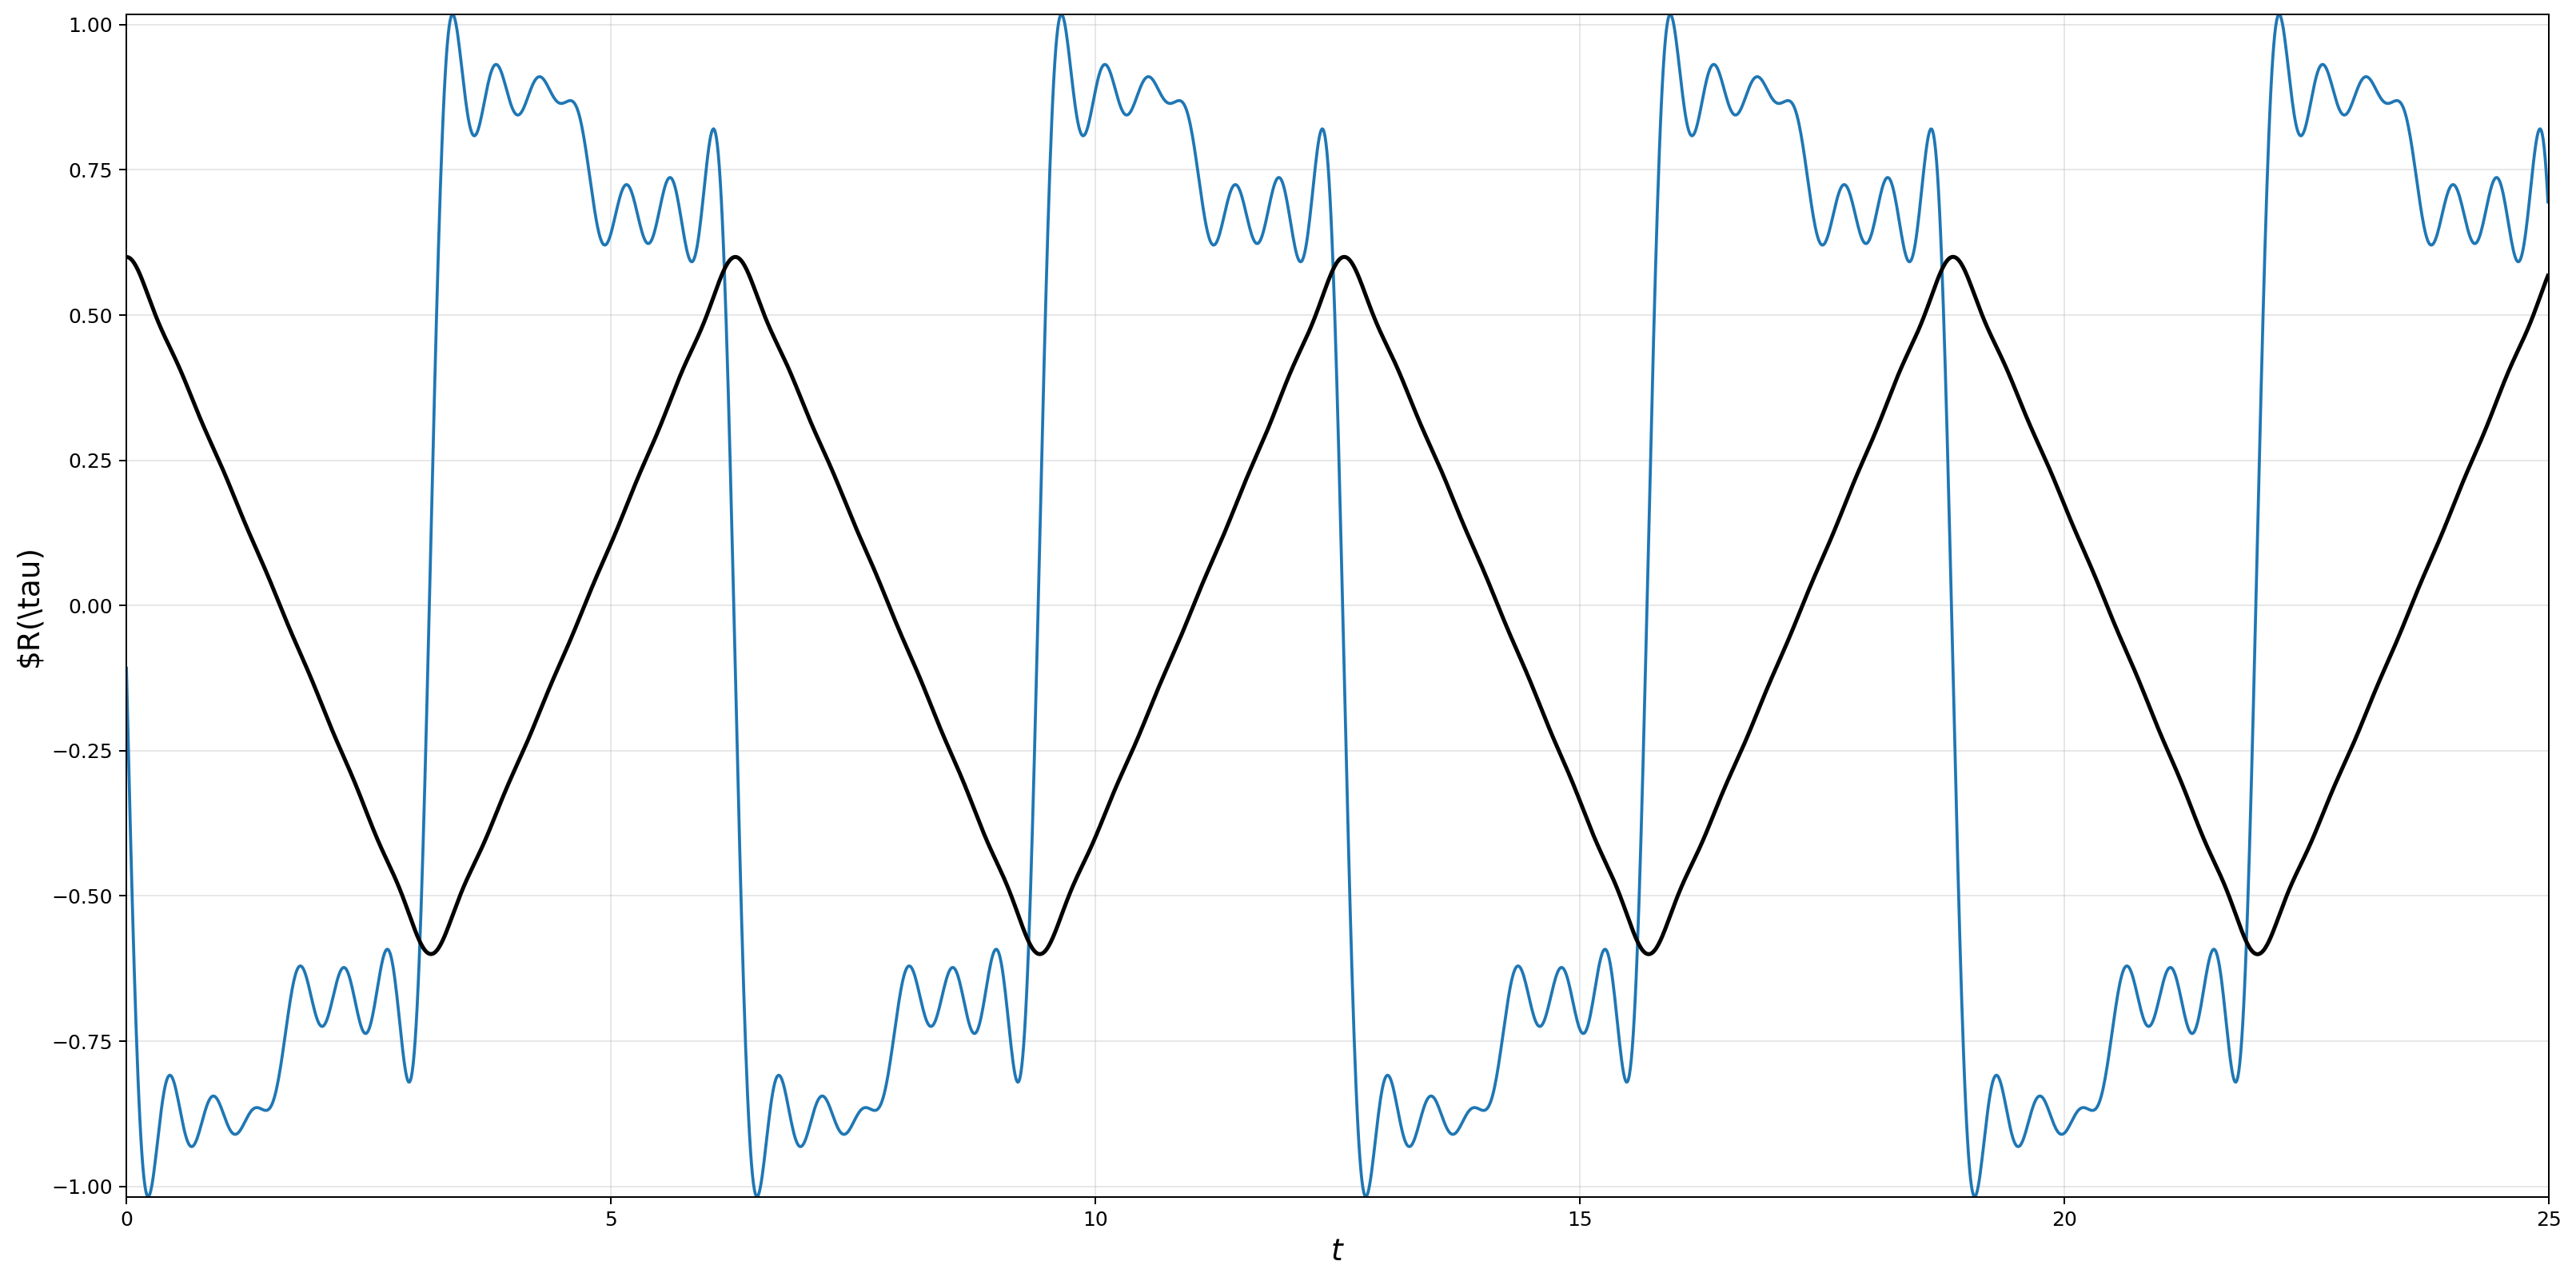

In [ ]:
# Correlation function
%matplotlib inline
import numpy as np
import math
import scipy
from scipy import signal
#import scipy.signal

import matplotlib.pyplot as plt  # data plotting
from matplotlib import rcParams
from matplotlib.pyplot import figure

rcParams['figure.figsize']     = [18,9]
rcParams['lines.markersize']   = 9         # marker size in points
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['figure.dpi']     = 180

# Main
#  time stamp
Nsample  = 10000
dt = 1/100  # time step  =>
time = np.arange(Nsample)*dt

# create an 1D array populated with random samples
mu = 0
sigma = 0 # scale
eta = sigma * np.random.randn(Nsample) + mu

# Simulate a Cosine wave
# k0 = 1  # phase shift
# Random phase shift between -1 and 1
k0 = np.random.uniform(-np.pi, np.pi)

a_k = [1, -3, 5, -7, 9, -11, 13]

# Initialize signal
xi = np.zeros_like(time)

# Add cosine components with scaling by 1/k
for k in a_k:
    xi += np.cos(k * time - k0 * np.pi) / k

# Add noise
xi += eta

# Compute numerically the autocorrelation via Fourier transform
fft_cor = scipy.signal.fftconvolve(xi, xi[::-1])[Nsample-1:]
fft_cor /= (Nsample - np.arange(Nsample))

plt.plot(time[:Nsample//4],xi[:Nsample//4])
plt.xlim(0,time[Nsample//4])
plt.ylim(min(xi[:Nsample//4]),max(xi[:Nsample//4]))
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.xlabel(r'$t$')
plt.ylabel(r'$R(\tau)');
plt.plot(time[:Nsample//4], fft_cor[:Nsample//4], 'k-', lw=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
def AutoCorr1(X):
    # Compute numerically the autocorrelation via Fourier transform
    Nsample  = len(X) # time length
    fft_cor = scipy.signal.fftconvolve(X, X[::-1],mode='full')[Nsample-1:]
    fft_cor /= (Nsample - np.arange(Nsample))
    return fft_cor[:len(X)//2]

def AutoCorr2(x):
    #  time complexicity is N*log(N)
    r2=np.fft.ifft(np.abs(np.fft.fft(x))**2).real
    c=(r2/x.shape-np.mean(x)**2)/np.std(x)**2
    return c[:len(x)//2]

def AutoCorr3(X, twosided=False, tapered=True):
    X = X - X.mean()
    acf = np.correlate(X,X,mode='full')[len(X)-1:]#np.correlate computes also negative lags
    #since the function is symmetric, use only the half with positive lags
    acf = acf / acf[0]# normalize with the variance
    return acf

def AutoCorr4(x):
    xp = x - x.mean()
    min_number_zeros = 2 * len(xp) - 1
    # Zero pad to the next power of two for maximum speed.
    fts = 2 ** np.ceil(np.log2(min_number_zeros)).astype('int')
    ft = np.fft.fft(np.array(xp), fts)
    corr = np.fft.ifft(ft.conjugate() * ft)[:len(xp)].real
    corr /= np.arange(len(xp), 0, -1)
    corr /= corr[0]
    return corr[:len(x)//2]


In [ ]:
np.random.seed(1)
Nsample = 512
lags      = int(Nsample/16)

x = np.random.normal(0, 1, Nsample)
# Test each function
r1 = AutoCorr1(x)
r2 = AutoCorr2(x)
r3 = AutoCorr3(x)
r4 = AutoCorr4(x)


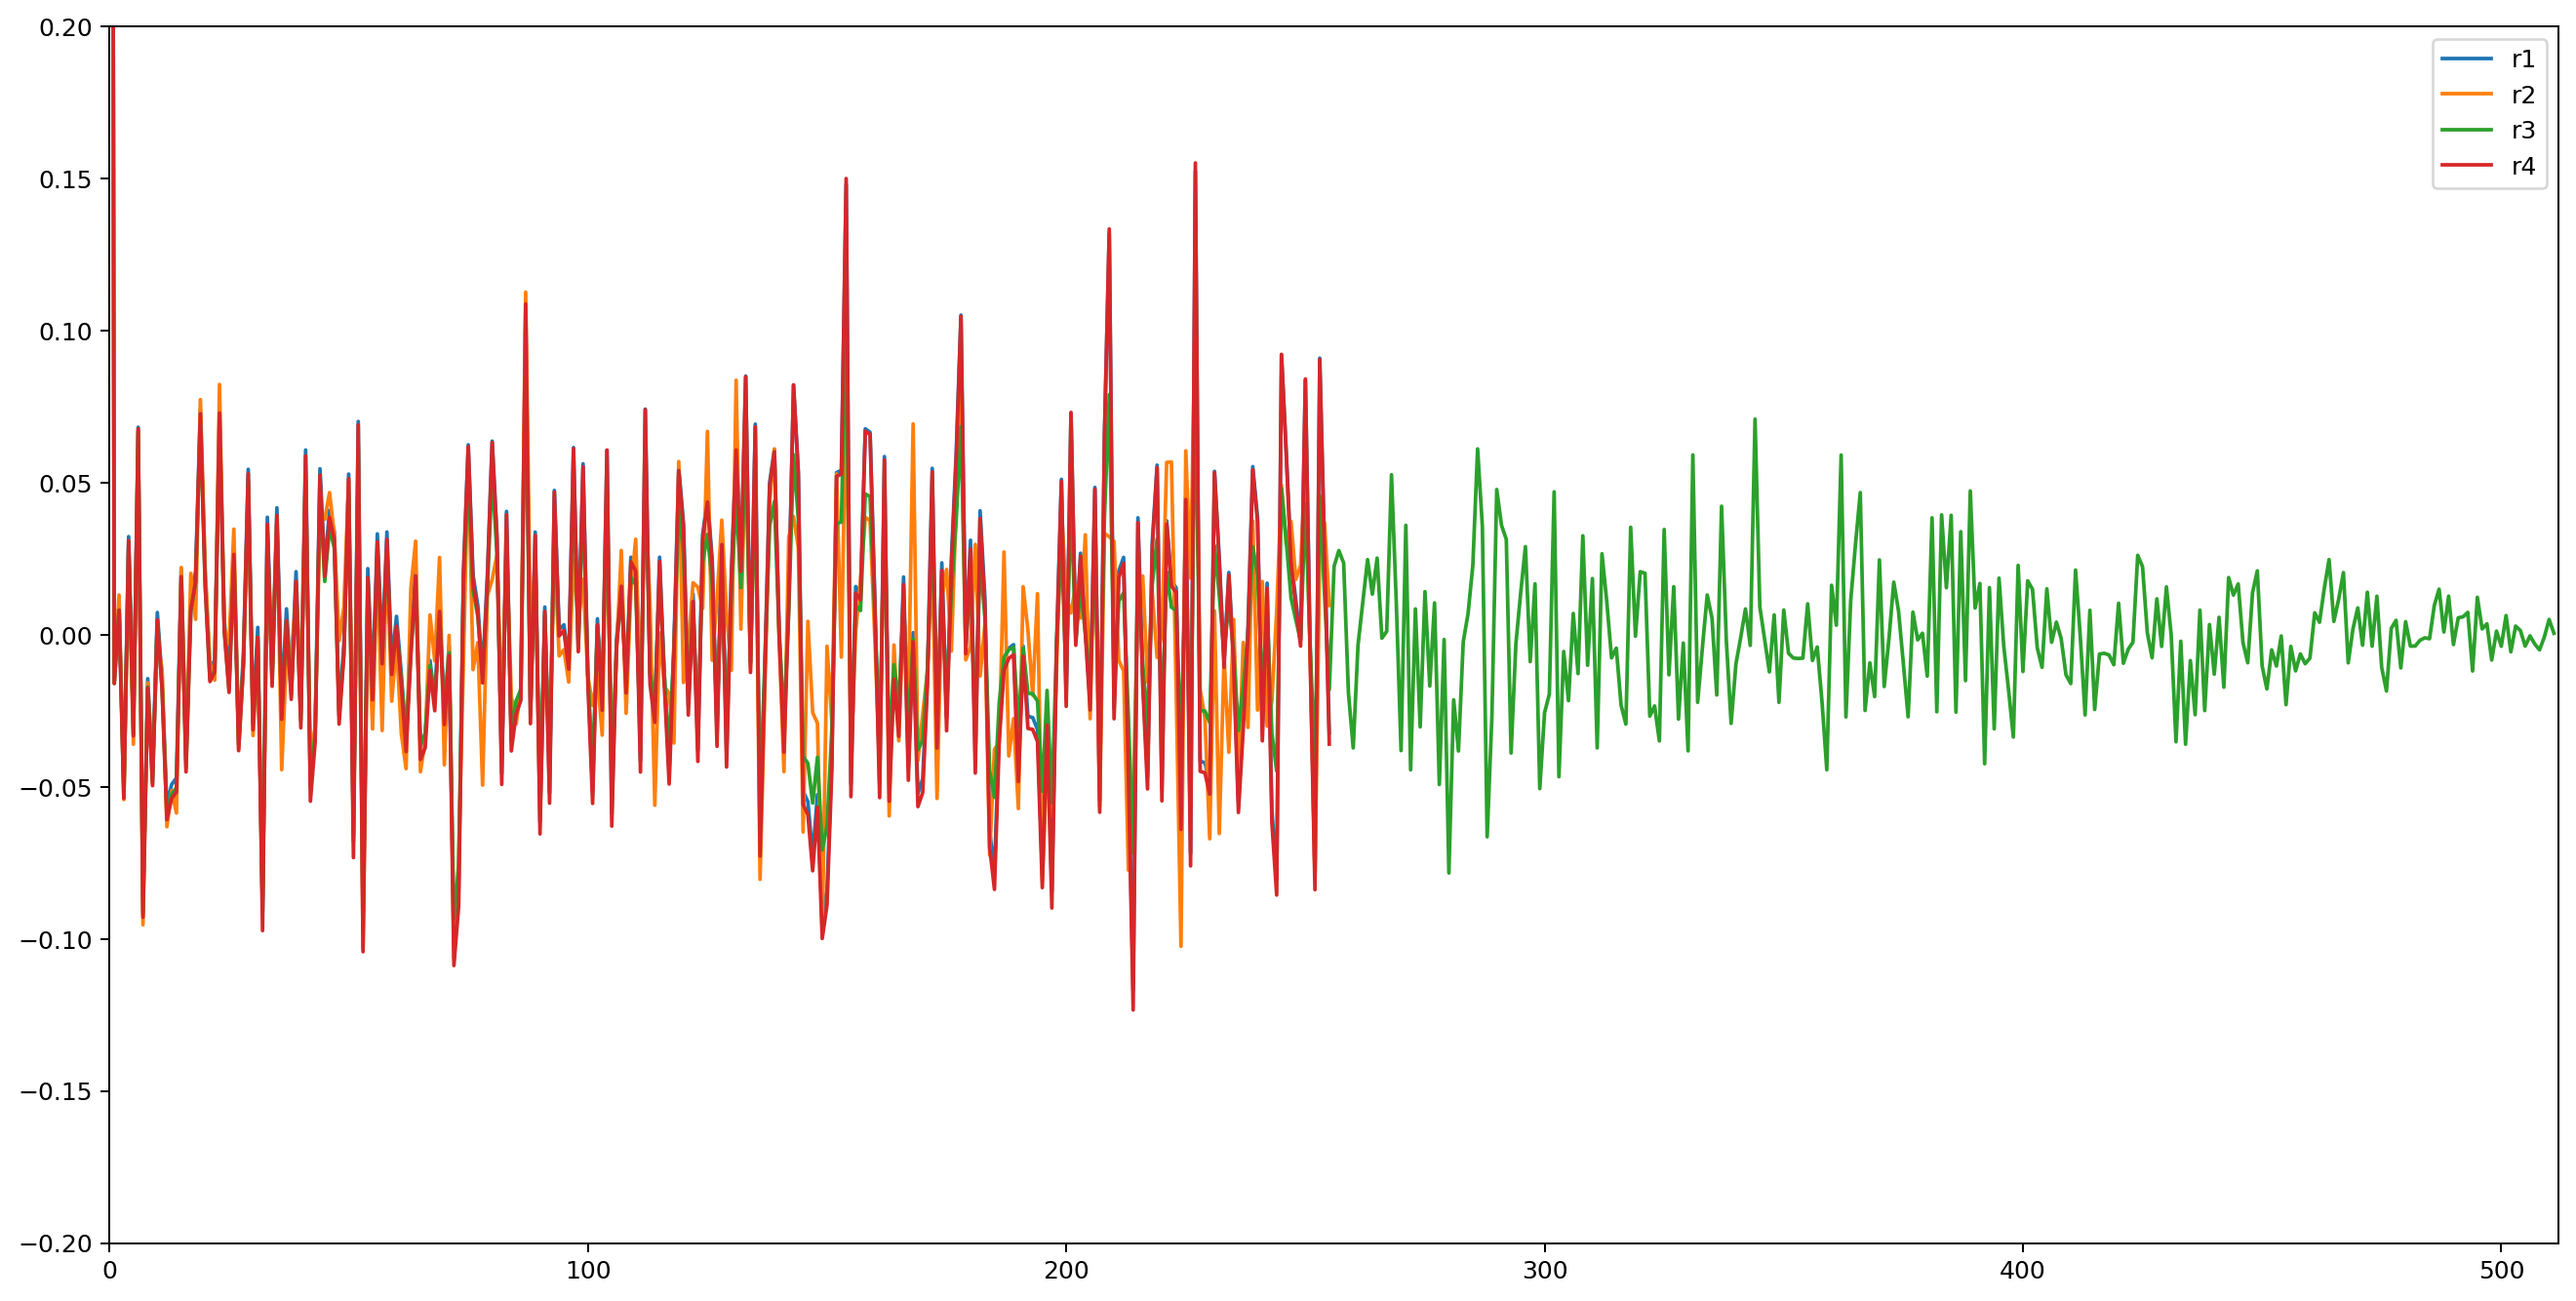

In [ ]:
plt.plot(r1,label = 'r1')
plt.plot(r2,label = 'r2')
plt.plot(r3,label = 'r3')
plt.plot(r4,label = 'r4')
plt.xlim(0,len(x))
plt.ylim(-.2,.2)
plt.legend()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=77bc1c5c-a916-4b0d-b67e-f412197c3c90' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>